In [43]:
# pip install sklearn==0.0.post11

In [44]:
PATH = "/content/drive/MyDrive/DSc_Project_Sem7/data"

NEW_DATA_PATH = "/content/drive/MyDrive/DSc_Project_Sem7/data/new_data.csv"

In [45]:
pip install scikit-learn

In [46]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
pip show sklearn

In [48]:
data = pd.read_csv(NEW_DATA_PATH)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37445 entries, 0 to 37444
Data columns (total 68 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   GEOLEVEL                         37445 non-null  object 
 1   GEOID                            37445 non-null  object 
 2   GEONAME                          37445 non-null  object 
 3   MARKET                           37445 non-null  object 
 4   YEAR                             37445 non-null  int64  
 5   TOT_ORIG                         37445 non-null  float64
 6   AVE_LOANAMT                      37445 non-null  float64
 7   AVE_PROPVAL                      37445 non-null  float64
 8   AVE_INTRATE                      37445 non-null  float64
 9   PCT_INTRATE_LT_3                 37445 non-null  float64
 10  PCT_INTRATE_3_4                  37445 non-null  float64
 11  PCT_INTRATE_4_5                  37445 non-null  float64
 12  PCT_INTRATE_5_6   

In [50]:
## GEOLEVEL, GEOID, GEONAME, MARKET

print(data["GEOLEVEL"].value_counts())

temp_data = data.copy()

data = data[data["GEOLEVEL"] == "State"]
data_test = temp_data[temp_data["GEOLEVEL"] == "National"]

print(data_test)

State              29381
Census Division     5184
Census Region       2304
National             576
Name: GEOLEVEL, dtype: int64
       GEOLEVEL GEOID        GEONAME                    MARKET  YEAR  \
0      National   USA  United States             All Mortgages  1998   
1      National   USA  United States             All Mortgages  1999   
2      National   USA  United States             All Mortgages  2000   
3      National   USA  United States             All Mortgages  2001   
4      National   USA  United States             All Mortgages  2002   
...         ...   ...            ...                       ...   ...   
35901  National   USA  United States  Jumbo Market (Refinance)  2017   
35902  National   USA  United States  Jumbo Market (Refinance)  2018   
35903  National   USA  United States  Jumbo Market (Refinance)  2019   
35904  National   USA  United States  Jumbo Market (Refinance)  2020   
35905  National   USA  United States  Jumbo Market (Refinance)  2021   

      

In [51]:
data["GEOID"].value_counts()

AK    579
DE    577
SD    577
PA    576
ND    576
NE    576
NH    576
NJ    576
NM    576
NV    576
NY    576
OH    576
OK    576
OR    576
RI    576
MT    576
SC    576
TN    576
TX    576
UT    576
VA    576
VT    576
WA    576
WI    576
WV    576
NC    576
MS    576
AL    576
MO    576
AR    576
AZ    576
CA    576
CO    576
CT    576
DC    576
FL    576
GA    576
HI    576
IA    576
ID    576
IL    576
IN    576
KS    576
KY    576
LA    576
MA    576
MD    576
ME    576
MI    576
MN    576
WY    576
Name: GEOID, dtype: int64

In [52]:
data["GEONAME"].value_counts()

## GEONAME & GEOID are the same

Alaska                  579
Delaware                577
South Dakota            577
Pennsylvania            576
North Dakota            576
Nebraska                576
New Hampshire           576
New Jersey              576
New Mexico              576
Nevada                  576
New York                576
Ohio                    576
Oklahoma                576
Oregon                  576
Rhode Island            576
Montana                 576
South Carolina          576
Tennessee               576
Texas                   576
Utah                    576
Virginia                576
Vermont                 576
Washington              576
Wisconsin               576
West Virginia           576
North Carolina          576
Mississippi             576
Alabama                 576
Missouri                576
Arkansas                576
Arizona                 576
California              576
Colorado                576
Connecticut             576
District of Columbia    576
Florida             

In [53]:
data["MARKET"].value_counts()

Jumbo Market (Refinance)                          1227
Jumbo Market                                      1225
Jumbo Market (Home Purchase)                      1225
Enterprise Acquisitions (Home Purchase)           1224
Other Conforming Market (Refinance)               1224
Enterprise Acquisitions (Refinance)               1224
Government (Refinance)                            1224
Conventional Conforming Market (Refinance)        1224
Conforming Market (Refinance)                     1224
Conventional Market (Refinance)                   1224
All Mortgages (Refinance)                         1224
Other Conforming Market (Home Purchase)           1224
All Mortgages                                     1224
Conventional Market                               1224
Conventional Conforming Market (Home Purchase)    1224
Conforming Market (Home Purchase)                 1224
Conventional Market (Home Purchase)               1224
All Mortgages (Home Purchase)                     1224
Other Conf

Setting Target Variable

In [54]:
print("Average Loan Amount : ",sum(data["AVE_LOANAMT"])/len(data))
print("Minimum Loan Amount : ",min(data["AVE_LOANAMT"]))
print("Maximum Loan Amount : ",max(data["AVE_LOANAMT"]))

Average Loan Amount :  239.1098120423541
Minimum Loan Amount :  42.0
Maximum Loan Amount :  3041.0


In [55]:
print("Average LTV : ", sum(data["AVE_LTV"])/len(data))
print("Minimum LTV : ",min(data["AVE_LTV"]))
print("Maximum LTV : ",max(data["AVE_LTV"]))

Average LTV :  75.48781402527844
Minimum LTV :  36.0
Maximum LTV :  125.0


In [56]:
y_out = data["AVE_LTV"]
y_test = data_test["AVE_LTV"]

for col in data.columns :
  if col.find("LTV") != -1:
    data.drop([col],axis=1,inplace = True)
    data_test.drop([col],axis=1,inplace=True)

print(data.columns)

Index(['GEOLEVEL', 'GEOID', 'GEONAME', 'MARKET', 'YEAR', 'TOT_ORIG',
       'AVE_LOANAMT', 'AVE_PROPVAL', 'AVE_INTRATE', 'PCT_INTRATE_LT_3',
       'PCT_INTRATE_3_4', 'PCT_INTRATE_4_5', 'PCT_INTRATE_5_6',
       'PCT_INTRATE_GE_6', 'PCT_OWNOCC', 'AVE_TERM', 'PCT_ARM',
       'PCT_TERM_FRM_15', 'PCT_TERM_FRM_30', 'AVE_DTI', 'PCT_DTI_LE36',
       'PCT_DTI_3743', 'PCT_DTI_GE44', 'AVE_VANTAGESCR', 'PCT_VS_VERYPOOR',
       'PCT_VS_POOR', 'PCT_VS_FAIR', 'PCT_VS_GOOD', 'PCT_VS_EXCELLENT',
       'PCT_GOVERNMENT', 'PCT_ENTERPRISE', 'PCT_OTHERCONFORMING',
       'PCT_NONCONFORMING', 'PCT_WHT', 'PCT_BLK', 'PCT_ASN', 'PCT_HPI',
       'PCT_AMI', 'PCT_MIX', 'PCT_HIS', 'PCT_HSP', 'PCT_WNH', 'PCT_MNH',
       'AVE_AGE_BORROWER', 'PCT_AGE_LT25', 'PCT_AGE_2534', 'PCT_AGE_3544',
       'PCT_AGE_4554', 'PCT_AGE_5564', 'PCT_AGE_GE65', 'PCT_MALEBOR',
       'PCT_FEMALEBOR', 'PCT_TWOBOR', 'PCT_MULTIBOR', 'UNEMPLOYMENT_RATE',
       'ANNUAL_CHANGE_UNEMPLOYMENT_RATE', 'GDP', 'ANNUAL_CHANGE_GDP',
       'IN

<ipython-input-56-f5b06eabe8d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop([col],axis=1,inplace=True)
<ipython-input-56-f5b06eabe8d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop([col],axis=1,inplace=True)
<ipython-input-56-f5b06eabe8d2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test.drop([col],axis=1,inplace=True)
<ipython-input-56-f5b06eabe8d2>:7: SettingWithCopyWarning: 
A value is

In [57]:
## Draw the correlation between Loan Value & Prop Value

print(y_out.corr(data["AVE_LOANAMT"]))
print(y_out.corr(data["AVE_PROPVAL"]))

0.20362541542563042
0.060054176103789526


One Hot Encoding for categories

In [58]:
one_hot_encoding = pd.get_dummies(data, columns = ["MARKET","GEONAME"])
one_hot_encoding_test =  pd.get_dummies(data_test, columns = ["MARKET","GEONAME"])

print(len(one_hot_encoding.columns))
print(len(data.columns))

133
60


In [59]:
one_hot_encoding.drop(["GEOID","GEOLEVEL"], inplace=True,axis=1)

In [60]:
one_hot_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29381 entries, 336 to 37444
Columns: 131 entries, YEAR to GEONAME_Wyoming
dtypes: float64(55), int64(1), uint8(75)
memory usage: 14.9 MB


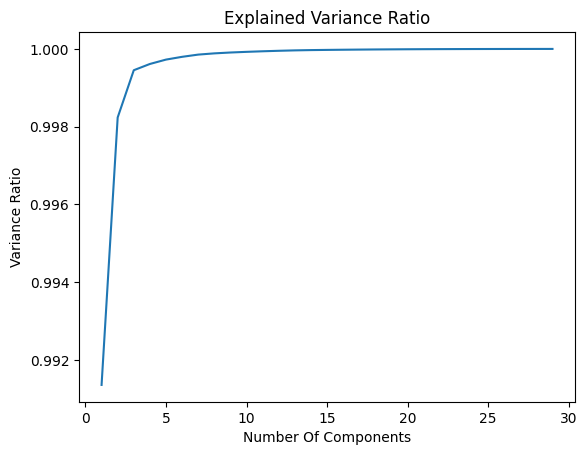

In [61]:
## Applying PCA

variance_ratio = []
n_components = []

for i in range(1,30) :
  pca = sklearn.decomposition.PCA(n_components = i)
  x_pca = pca.fit(one_hot_encoding)

  var = sum(x_pca.explained_variance_ratio_)
  variance_ratio.append(var)
  n_components.append(i)

plt.plot(n_components,variance_ratio)
plt.title("Explained Variance Ratio")
plt.xlabel("Number Of Components")
plt.ylabel("Variance Ratio")
plt.show()

Not One Hot Encoded

In [62]:
new_df = data.drop(["MARKET","GEOLEVEL","GEONAME","GEOID"],axis=1)
new_df_test = data_test.drop(["MARKET","GEOLEVEL","GEONAME","GEOID"],axis=1)

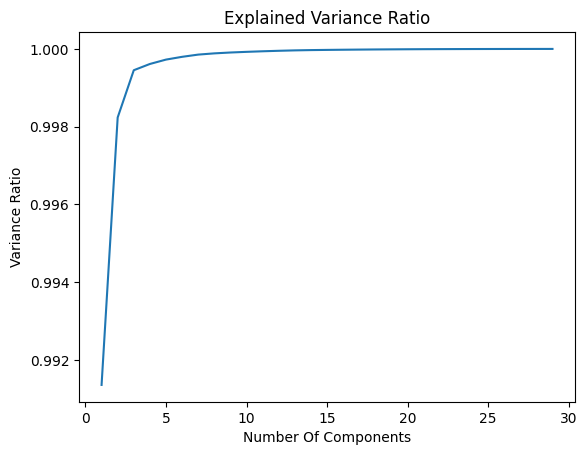

In [63]:
## Applying PCA

variance_ratio = []
n_components = []

for i in range(1,30) :
  pca = sklearn.decomposition.PCA(n_components = i)
  x_pca = pca.fit(new_df)

  var = sum(x_pca.explained_variance_ratio_)
  variance_ratio.append(var)
  n_components.append(i)

plt.plot(n_components,variance_ratio)
plt.title("Explained Variance Ratio")
plt.xlabel("Number Of Components")
plt.ylabel("Variance Ratio")
plt.show()


Linear Regression (without Binning)

In [64]:
## Normalise the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_df)

test_scaler = MinMaxScaler()
x_test = test_scaler.fit_transform(new_df_test)

print(y_out)

336      77.0
337      76.0
338      78.0
339      77.0
340      76.0
         ... 
37440    65.0
37441    69.0
37442    57.0
37443    84.0
37444    48.0
Name: AVE_LTV, Length: 29381, dtype: float64


In [65]:
print(len(x_test[0]),len(scaled_data[0]))


56 56


In [66]:
from sklearn.linear_model import LinearRegression

x_train = scaled_data
y_train = y_out

lr = LinearRegression()
lr.fit(scaled_data,y_out)


LinearRegression()

In [67]:
lr.score(x_test,y_test)

-44.67492796818995

Predictive Analysis (with Binning)

In [68]:
## Normalise the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data_bin = scaler.fit_transform(one_hot_encoding)

test_scaler = MinMaxScaler()
x_test = test_scaler.fit_transform(one_hot_encoding_test)

print(y_out)

ValueError: ignored

In [ ]:
# from sklearn.model_selection import train_test_split

# x_train_bin,x_test_bin,y_train_bin,y_test_bin = train_test_split(scaled_data_bin,y_out)

In [ ]:
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()
# lr.fit(x_train_bin,y_train_bin)



In [ ]:
# lr.score(x_test_bin,y_test_bin)

Regression Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dt = DecisionTreeRegressor(splitter = "best")
dt.fit(x_train,y_train)

y_pred = dt.predict(x_test)

print(r2_score(y_pred,y_test))

In [ ]:
# dt = DecisionTreeRegressor(splitter = "best")
# dt.fit(x_train_bin,y_train_bin)

# y_pred = dt.predict(x_test_bin)

# print(r2_score(y_pred,y_test_bin))

Neural Networks

In [ ]:
# x_train_bin,x_test_bin,y_train_bin,y_test_bin = train_test_split(scaled_data_bin,y_out,test_size=0.2)
# x_train_bin,x_val_bin,y_train_bin,y_val_bin =  train_test_split(x_train,y_train,test_size=0.125)

In [ ]:
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(max_iter=600,alpha=0.01, hidden_layer_sizes = (32,16,1),solver="adam",early_stopping=True)

train_loss = []
val_loss = []
iter = []

# for i in range(20):
#   history = nn.partial_fit(x_train,y_train)
#   train_loss.append(history.loss_)
#   iter.append(i+1)

nn.fit(x_train,y_train)

val_loss = nn.validation_scores_
train_loss = nn.loss_curve_

plt.plot(np.arange(1,len(train_loss)+1),train_loss)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Epochs")
plt.show()

plt.plot(np.arange(1,len(val_loss)+1),val_loss)
plt.xlabel("Iterations")
plt.ylabel("R2 Score")
plt.title("R2 Validation Score vs Epochs")
plt.show()

y_pred = nn.predict(x_test)
print(r2_score(y_pred,y_test))

In [ ]:
# nn = MLPRegressor(max_iter=600,alpha=0.01, hidden_layer_sizes = (64,1))
# nn.fit(x_train_bin,y_train_bin)

# y_pred = nn.predict(x_test_bin)
# print(r2_score(y_pred,y_test_bin))